In [12]:
# Librerias 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
# Leer archivo

bankT = pd.read_csv('bank_transactions.csv')

In [14]:
# Head

bankT.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [15]:
# Drop de valores null
bankT = bankT.dropna()

# Verificar que ya no hay valores null
if not bankT.isnull().values.any():
    print("Valores nulos:", bankT.isnull().values.any())

Valores nulos: True
Valores nulos: False


In [16]:
# Drop de valores duplicados
bankT = bankT.drop_duplicates()

if not bankT.duplicated().values.any():
    print("Valores duplicados:", bankT.duplicated().values.any())

Valores duplicados: False


<AxesSubplot:xlabel='CustGender', ylabel='count'>

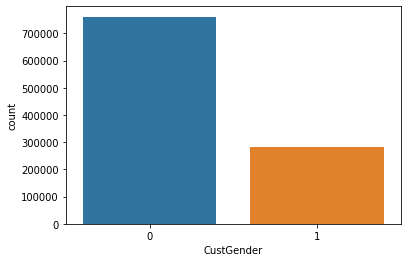

In [27]:
# Pasar a numerico

bankT['CustGender'] = bankT['CustGender'].replace(['M','F'],[0,1])
bankT = bankT[bankT['CustGender'] != 'T']

# Grafico de barras
sns.countplot(x='CustGender', data=bankT)

<AxesSubplot:>

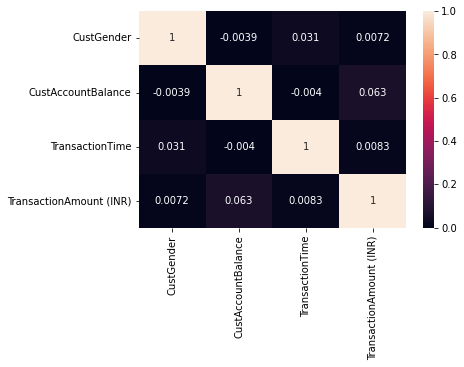

In [32]:
# Grafico exploratorio
sns.heatmap(bankT.corr(), annot=True)

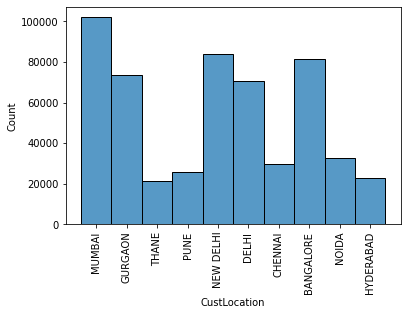

In [44]:
# Histograma exploratorio
top10 = bankT['CustLocation'].value_counts().nlargest(10).index.tolist()
bankT_top10 = bankT[bankT['CustLocation'].isin(top10)]

sns.histplot(x='CustLocation', data=bankT_top10)
plt.xticks(rotation=90)
plt.show()

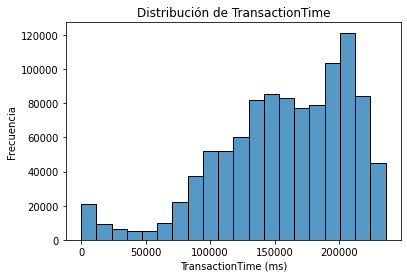

In [46]:
sns.histplot(data=bankT, x="TransactionTime", bins=20)
plt.xlabel("TransactionTime (ms)")
plt.ylabel("Frecuencia")
plt.title("Distribución de TransactionTime")
plt.show()

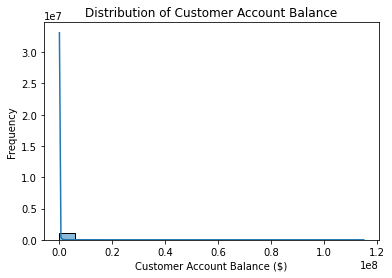

In [48]:
sns.histplot(data=bankT, x="CustAccountBalance", kde=True)
plt.xlabel("Customer Account Balance ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Account Balance")
plt.show()
